In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_youngest(title):
    """
    returns youngest GM or WGM from players df
    """
    GMs = df_players.loc[df_players['title'] == title]
    years = GMs['year']
    youngGM_year = years.max()
    youngGM = GMs.loc[GMs['year'] == youngGM_year]
    return youngGM

def get_career_stats(df):
    """
    returns the career stats from FIDE df for the youngest MGM and WGM
    """
    id_youngest_GMs = df.iloc[0, 0]
    stats = df_fide.loc[df_fide['fide_id'] == id_youngest_GMs]
    return stats

def cukus_kungmongmanh_stats(name):
    '''
    collates and orders points for cukus and kungmongmahn
    '''
    black = cleaned_translated_CK.loc[cleaned_translated_CK['black_username'] == name].drop(columns=['white_username', 'white_result']).rename(columns={'black_username':'name'}).rename(columns={'black_result':'points'})
    white = cleaned_translated_CK.loc[cleaned_translated_CK['white_username'] == name].drop(columns=['black_username', 'black_result']).rename(columns={'white_username':'name'}).rename(columns={'white_result':'points'})
    ordered_games = pd.concat([black, white], axis=0, join="outer").sort_index(ascending=True)
    cumsum = ordered_games['cumulative points'] = ordered_games["points"].cumsum()
    cumalative_lst = ordered_games['cumulative points'].tolist()
    return ordered_games, cumalative_lst


# Loading the data 
The by year FIDE datasets are concatenated into one dataframe (df_fide).

In [3]:
df_16 = pd.read_csv('/Users/isaaclambert/Desktop/2016.csv')
df_17 = pd.read_csv('/Users/isaaclambert/Desktop/2017.csv')
df_18 = pd.read_csv('/Users/isaaclambert/Desktop/2018.csv')
df_19 = pd.read_csv('/Users/isaaclambert/Desktop/2019.csv')
df_20 = pd.read_csv('/Users/isaaclambert/Desktop/2020.csv')
df_players = pd.read_csv('/Users/isaaclambert/Desktop/players.csv') #FIDE players by federation/gender/rank 
df_games = pd.read_csv('/Users/isaaclambert/Desktop/games.csv') #chess.com WGM games from Sep 2009
df_mappings = pd.read_csv('/Users/isaaclambert/Desktop/mappings.csv') #chess.com username <-> FIDE identifer
frames = [df_16, df_17, df_18, df_19, df_20]
df_fide = pd.concat(frames, axis=0, join="outer", ignore_index=True) #concatenated FIDE dataset 16-20

# Question 1

Two functions are called, 'find_youngest' and 'get_career_stats'. The first selects the yougest GM and WGM from df_players. The second cross-references their information with df_fide to get their career history form 2016 onwards.

In [4]:
#info for youngest GM and WGM
youngestMGM = find_youngest('GM')
youngestWGM = find_youngest('WGM')
display(youngestMGM, youngestWGM)

#just names of youngest GM and WGM
justname_MGM = youngestMGM.iloc[0, 1]
justname_WGM = youngestWGM.iloc[0, 1]

#stat dataframes for youngest GM and WGM
stats_youngestMGM = get_career_stats(youngestMGM)
stats_youngestWGM = get_career_stats(youngestWGM)

,id,name,federation,gender,title,year
409564,46616543,Gukesh D,IND,M,GM,2006


,id,name,federation,gender,title,year
360862,34127035,"Garifullina, Leya",RUS,F,WGM,2004


Creates certain variables from sub-views of the function-calls above for the purposes of plotting.

In [5]:
years = stats_youngestMGM['year'].values.tolist() 
months = stats_youngestMGM['month'].values.tolist() 

#covert the months to years and add them so we have the times all in years
year_month = [i[0] + (1/12*i[1]) for i in zip(years, months)]

#male + woman GM standard ratings lists
young_MGM_standard = stats_youngestMGM['rating_standard'].values.tolist()
young_WGM_standard = stats_youngestWGM['rating_standard'].values.tolist()

#rapid ratings 
young_MGM_rapid = stats_youngestMGM['rating_rapid'].values.tolist()
young_WGM_rapid = stats_youngestWGM['rating_rapid'].values.tolist()

#blitz ratings
young_MGM_blitz = stats_youngestMGM['rating_blitz'].values.tolist()
young_WGM_blitz = stats_youngestWGM['rating_blitz'].values.tolist()

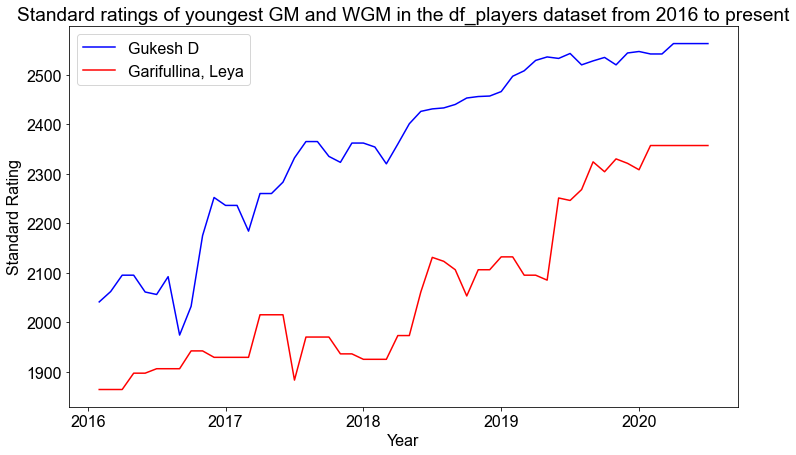

In [6]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.plot(year_month, young_MGM_standard, 'b', label= justname_MGM)
plt.plot(year_month, young_WGM_standard, 'r', label= justname_WGM)
plt.title('Standard ratings of youngest GM and WGM in the df_players dataset from 2016 to present')
plt.ylabel("Standard Rating")
plt.xlabel("Year")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.legend(loc='best')
plt.show()

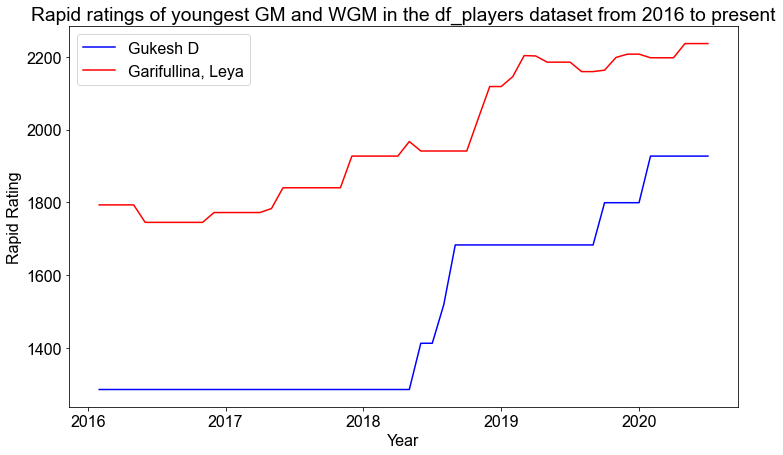

In [7]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.plot(year_month, young_MGM_rapid, 'b', label= justname_MGM)
plt.plot(year_month, young_WGM_rapid, 'r', label= justname_WGM)
plt.title('Rapid ratings of youngest GM and WGM in the df_players dataset from 2016 to present')
plt.ylabel("Rapid Rating")
plt.xlabel("Year")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.legend(loc='best')
plt.show()

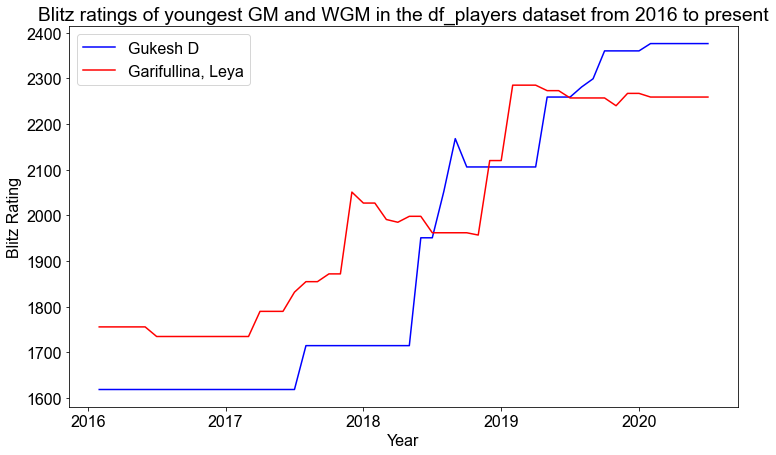

In [8]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.plot(year_month, young_MGM_blitz, 'b', label= justname_MGM)
plt.plot(year_month, young_WGM_blitz, 'r', label= justname_WGM)
plt.title('Blitz ratings of youngest GM and WGM in the df_players dataset from 2016 to present')
plt.ylabel("Blitz Rating")
plt.xlabel("Year")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.legend(loc='best')
plt.show()

## Analysis 
* From the visualisations is clear that both players have improved  significantly over time in all three games.
* In Blitz, Garifullina was rated higher until mid 2018 at which point both players surpassed each other interchangeably until Gukesh took the lead in mid 2019 which he has held until the present. 
* In Standard games Gukesh is and has been noticeably superior while in Rapid games, Garifullina is and has been noticeably superior. The current margin between the two players in both these games is comparable.

# Question 2

* The 'df_players' dataframe is cleaned by all non-master players being dropped. 
* The counts for each federation are found. 
* This new dataframe (raw_fed_count) is cleaned by the excess columns being dropped and the remaining column being renamed to 'count'. 
* A series of federations is made and the top 20 are converted to a list for a later iteration. 

In [9]:
only_masters = df_players.dropna()#drops non-masters players

#creates new df with unique federation values as index and their counts
raw_fed_count = only_masters.groupby(by='federation').count() 

#deletes excess columns, renames remaining column, sorts values by count from highest to lowest 
fed_count = raw_fed_count.drop(columns=['name', 'gender', 'title', 'year']).rename(columns={'id':'count'}).sort_values(by=['count'], ascending=False)

fed_count['federation'] = fed_count.index #creates series of federations from index

#takes federations column, selects top 20, converts to list
federations = fed_count.iloc[:, 1].head(20).values.tolist() 

#takes count column, selects top 20, converts to list
count = fed_count.iloc[:, 0].head(20).values.tolist()


* A dictionary, 'fide20_fedID_dic', is created.
* The federations list is iterated through.
    * A view of just the IDs of the masters by federation is made. 
    * Using these IDs this view is merged with the 2020 FIDE statistics ('df_20_renamed'). 
    * The intersection is taken. 
    * Various statistics are generated about'rating_standard' column then added to the dictionary. This column is chosen as it is the only player rating column which has figures for every master. 
* The dictionary is converted to a dataframe. 'PR' stands for player rating.

In [10]:
#create dictionary with keys but no values, except for count key, count list passed in  
fide20_fedID_dic = {'federation':[], 'masters count': count, 'PR mean':[], 'PR standard deviation':[], 'PR IQR': []}
for i in federations:
    #takes a view for a single federation of just ids of masters and federation
    ids_per_fed = only_masters.loc[df_players['federation'] == i].drop(columns=['name', 'gender', 'title', 'year'])
   
    #renames 2020 FIDE id column for the purposes of the merge method
    df_20_renamed = df_20.rename(columns={'fide_id':'id'}) 
    
    #takes the intersection of the 2020 FIDE dataset and the ids by federation dataset 
    fide20_fedID = ids_per_fed.merge(df_20_renamed, how="inner", on='id') 
    count, mean, std, minn, firstQ, med, thirdQ, maxx = fide20_fedID['rating_standard'].describe()
    
    #append values to 'fide20_fedID_dic' dictionary 
    fide20_fedID_dic['federation'].append(i)
    fide20_fedID_dic['PR mean'].append(round(mean, 1))
    fide20_fedID_dic['PR standard deviation'].append(round(std, 1))
    fide20_fedID_dic['PR IQR'].append(round((thirdQ - firstQ), 1))

#convert dictionary to dataframe
player_ratings_by_federation = pd.DataFrame.from_dict(fide20_fedID_dic)
display(player_ratings_by_federation)

,federation,masters count,PR mean,PR standard deviation,PR IQR
0,RUS,2673,2266.6,163.9,204.0
1,GER,1575,2251.1,156.8,145.0
2,ESP,919,2131.4,300.5,297.0
3,USA,845,2225.6,238.5,251.8
4,IND,762,1945.3,424.7,706.0
5,SRB,630,2238.1,142.3,158.0
6,UKR,589,2298.8,163.7,203.0
7,FRA,581,2191.4,265.4,224.0
8,POL,495,2221.0,224.8,237.0
9,HUN,491,2244.6,173.6,210.0


## Analysis 
* While most of the top 20 federations are distributed fairly evenly, Russia and German have a significant lead on the rest while Russia even has a significant lead of Germany.
* Despite this, the leads are not reflected in the Player Rating Means which are all of a similar level, around 2000 - 2300. 
* The exception is India which has the lowest mean at 1945.6. This in conjuction with India having the highest standard deviation at 424.7 and IQR at 706.0 suggests that some of India's masters are among the lowest rated.

# Question 3

Here, we select only the games which took place from 2016 onwards

In [11]:
#splits the 'end_time' column by '-'
time_split = df_games.iloc[:, 4].str.split(pat= "-", expand=True)

#creates a bool series where value is True if >= 2016
boole_2016 = time_split[0] >= '2016'

#drops False values from series 
only_2016up_indexes = boole_2016[boole_2016]

#merges only True series with df_games dataset by index then resets it
#leaves only games from 2016 and later in df_games
games_2016 = pd.merge(df_games, only_2016up_indexes, left_index=True, right_index=True).reset_index()

Here, we further narrow the game to only those which took place between two WGM. This completes our preprocessing.

In [12]:
#makes list from unique WGM usernames 
wgm_username_list = games_2016.wgm_username.drop_duplicates().to_list()

#selects only games between two WGM --- This is the cleaned df ---
games_WGM_2016 = games_2016[(games_2016['white_username'].isin(wgm_username_list)) & (games_2016['black_username'].isin(wgm_username_list) )]

Below are all the games in which the winner had a lower rating. These being surprising results. There are a lot so the display function has a # unless the user wants to see.

In [13]:
surprising_results = games_WGM_2016.loc[((games_WGM_2016['white_result'] == 'win')&(games_WGM_2016['white_rating'] < games_WGM_2016['black_rating']))|((games_WGM_2016['black_result'] == 'win')&(games_WGM_2016['black_rating'] < games_WGM_2016['white_rating']))]
#display(surprising_results)

Here, the game counts, as white, as black and totalled, are found.

In [14]:
#WGM game counts by black and white
count_bywhite = games_WGM_2016.groupby(by='white_username').count().rename(columns={'index':'count as white'})
count_byblack = games_WGM_2016.groupby(by='black_username').count().rename(columns={'index':'count as black'})
only_white_count = count_bywhite['count as white'] # single series
only_black_count = count_byblack['count as black'] # single series


counts = [only_white_count, only_black_count] #make list for concatenation
WGM_counts = pd.concat(counts, axis=1, join="inner") #concatenate single counts 
summ = WGM_counts.sum(axis=1) #find their total
named_summ = summ[:].rename('total count') #give total name 

#merge total with white and black counts, sort total by descending
WGM_counts_total = pd.merge(WGM_counts , named_summ, left_index=True, right_index=True).sort_values(by=['total count'], ascending=False)
display(WGM_counts_total)


,count as white,count as black,total count
cukus,34,42,76
kungmongmanh,34,30,64
meoluoi91,14,24,38
martinique24,12,10,22
ahachess,12,6,18
ntmh281,10,8,18
yennefer1,4,12,16
ninullia,10,6,16
ticobello,6,8,14
axvesik,10,4,14


## Analysis
* Cukus (Papp Petra) and kungmongmanh (Thi Kim Phung Vo) have both played the most games by a significant margin. 
* Due to this and because in the 'suprising_games' dataframe several games between these two can be seen, the games between these two WGMs will be analyised. This avoids us having to find the game counts for every combination of WGM which would require a lot of processing power.

The types of result of their games are printed. Numerical values are assigned to each so that the results of their games can be plot. 
* win: 2 
* repetition: 1 
* insufficient: 1
* timeout: 0 
* reigned: 0
* checkmated: 0

In [15]:
#games just between cukus and kungmongmanh
cukus_kungmongmanh_games = games_WGM_2016.loc[((games_WGM_2016['white_username'] == 'cukus') & (games_WGM_2016['black_username'] == 'kungmongmanh')) | ((games_WGM_2016['white_username'] =='kungmongmanh' ) & (games_WGM_2016['black_username'] == 'cukus'))]

#print types of result so I know how to assign values
print(cukus_kungmongmanh_games['white_result'].unique())

#assign numercial values 
translated_CK_games = cukus_kungmongmanh_games.replace('win', 2).replace('repetition', 1).replace('timeout', 0).replace('resigned', 0).replace('insufficient', 1).replace('checkmated', 0)

['repetition' 'timeout' 'win' 'resigned' 'insufficient' 'checkmated']


The 'cukus_kungmongmanh_stats' function is called which returns a list of the cumulative scores for these two players over their games. These are plot below.

In [16]:
#drop all unnecessary columns 
cleaned_translated_CK = translated_CK_games.drop(columns=['game_id','index','game_url','pgn','time_control','rated','time_class','rules','wgm_username','white_rating','black_rating',0])

#calls cukus_kungmongmanh_stats
cukus_points, cukus_cumul_lst = cukus_kungmongmanh_stats('cukus')
kungmongmanh_points, kungmongmanh_cumul_lst = cukus_kungmongmanh_stats('kungmongmanh')

#number of games between cukus and kungmongmanh list
num_games = list(range(len(cukus_cumul_lst)))


By merging the mappings dataset and df_fide, the career history of cukus and kungmongmanh in standard games are selected and plot below.

In [17]:
#rename df_mappings ID column for later merge
df_mappings_rename = df_mappings.rename(columns={'fid': 'fide_id'})

#find rows in mappings for cukus and kungmongmanh
cukus_row = df_mappings_rename.loc[df_mappings['username'] == 'cukus']
kungmongmanh_row = df_mappings_rename.loc[df_mappings['username'] == 'kungmongmanh']

#select IDs for cukus and kungmongmanh
cukus_id = cukus_row.iloc[:, 2]
kungmongmanh_id = kungmongmanh_row.iloc[:, 2]

#cukus and kungmongmanh FIDE stats
cukus_stats = df_fide.merge(cukus_id, how='inner', on='fide_id')
kungmongmanh_stats = df_fide.merge(kungmongmanh_id, how='inner', on='fide_id')

#standard ratings lists for cukus and kungmongmanh
cukus_standard_lst = cukus_stats['rating_standard'].values.tolist()
kungmongmanh_standard_lst = kungmongmanh_stats['rating_standard'].values.tolist()

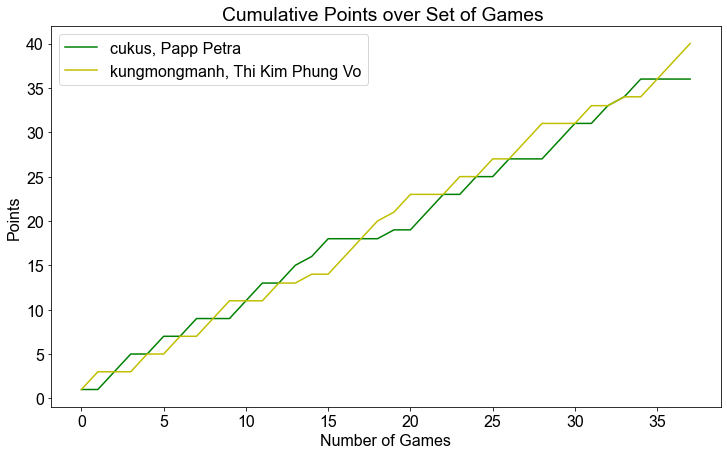

In [18]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.plot(num_games, cukus_cumul_lst , 'g', label= 'cukus, Papp Petra ')
plt.plot(num_games, kungmongmanh_cumul_lst, 'y', label= 'kungmongmanh, Thi Kim Phung Vo')
plt.title('Cumulative Points over Set of Games ')
plt.ylabel("Points")
plt.xlabel("Number of Games")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.legend(loc='best')
plt.show()

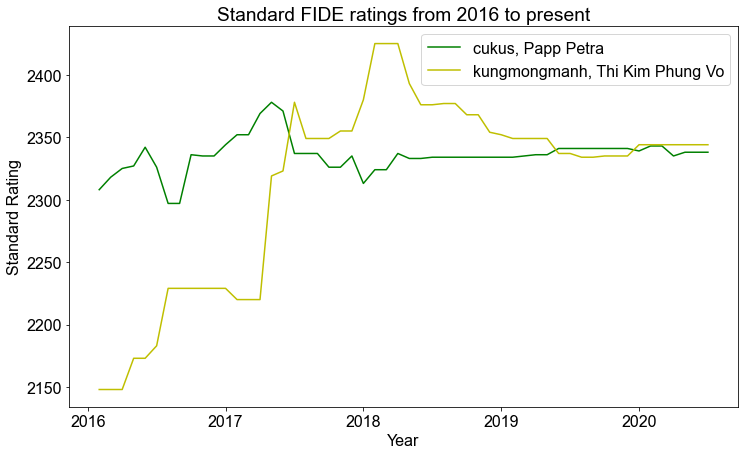

In [19]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.plot(year_month, cukus_standard_lst, 'g', label= 'cukus, Papp Petra ')
plt.plot(year_month, kungmongmanh_standard_lst, 'y', label= 'kungmongmanh, Thi Kim Phung Vo')
plt.title('Standard FIDE ratings from 2016 to present')
plt.ylabel("Standard Rating")
plt.xlabel("Year")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.legend(loc='best')
plt.show()

## Analysis
* Caution is required when comparing the careers histories of cukus and kungmongmanh with the results of their games since their careers histories are recorded from 2016 to the present while all of their games took place on 08/08/2017.
* With this in mind, the fact that kungmongmanh narrowly beat cukus on points during their games makes sense as around the same time her standard rating was narrowly higher that cukus's.

# Ethical Reflections
When analysing data of this sort one must be vigilant about possible implicit biases filtering through into the data representations. For example, before spotting my mistake, I initially selected the youngest female grandmaster as opposed to the yougest WGM. Perhaps however the female GMs should have been grouped with WGMs. Descisions of this kind are somewhat subjective and therefore ought to be transparent. 